In [ ]:
!pip install empiricaldist statsmodels sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import scipy.stats
import datetime

In [ ]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/db'

/content/drive/MyDrive/Colab Notebooks/db


In [ ]:
!ls -al

total 28984
-rw------- 1 root root 17207067 Feb 28  2021 covid_19_data.csv
-rw------- 1 root root  3096523 Jul 29  2021 dataset_info_comercial.parquet
-rw------- 1 root root  3096523 Jul 22  2021 dataset_prune.parquet
-rw------- 1 root root    23873 Aug  6  2020 diabetes.csv
-rw------- 1 root root    55628 Sep 27  2019 insurance.csv
-rw------- 1 root root    44417 Jun  9  2021 loan_payments_data.csv
-rw------- 1 root root  1034821 Apr 18  2021 london_merged.csv
-rw------- 1 root root   220188 Aug 22  2021 marketing_campaign.csv
-rw------- 1 root root  4769811 Apr 17  2021 Meteorite_Landings.csv
-rw------- 1 root root    29719 Apr 19  2021 poblacion.csv
-rw------- 1 root root      149 Apr 17  2021 test.csv
-rw------- 1 root root    84959 Apr 17  2021 test.hdf
-rw------- 1 root root      374 Apr 17  2021 test.json
-rw------- 1 root root     4635 Apr 17  2021 test.parquet
-rw------- 1 root root     1315 Apr 17  2021 test.pkl
-rw------- 1 root root     5177 Apr 17  2021 test.xlsx


# Data Collection, validation and preparation

## Loading data into a df

In [ ]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

## Cheking for duplicates

In [ ]:
rows = df.shape[0]
ids = len(list(df['ID'].unique()))
print('Is there duplicated: ', rows != ids)
print(f'rows: {rows}\nIDs: {ids}')

Is there duplicated:  False
rows: 2240
IDs: 2240


## Checking for null values

In [ ]:
df.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

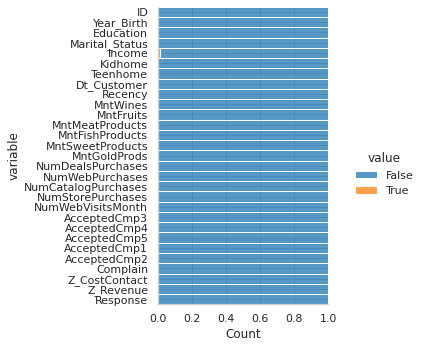

In [ ]:
(
    df
    .isnull()
    .melt()
    .pipe(
        lambda df : (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill'
            )
        )
    )
)

## Knowing the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.dtypes.value_counts()

int64      25
object      3
float64     1
dtype: int64

### Categorical columns

In [ ]:
obj = (df.dtypes == object)
obj_cols = [c for c in obj.index if obj[c] == True]
obj_cols # Dt_Customer is not a obj col instead is a date variable

['Education', 'Marital_Status', 'Dt_Customer']

In [ ]:
obj_cols.pop(2)
for obj_col in obj_cols:
  print(df[obj_col].value_counts(), '\n')

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64 

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 



### Numerical columns

In [ ]:
# Changing data type of `Dt_Customer` from object to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Creating age and seniority columns
df['today'] = datetime.date.today()
df['today'] = pd.to_datetime(df['today'], format='%Y-%m-%d')
df['seniority'] = (df['today'] - df['Dt_Customer']).astype('timedelta64[M]')
df['age'] = 2023 - df['Year_Birth']

df.drop(['today'], axis=1, inplace=True)

<AxesSubplot:xlabel='seniority', ylabel='Count'>

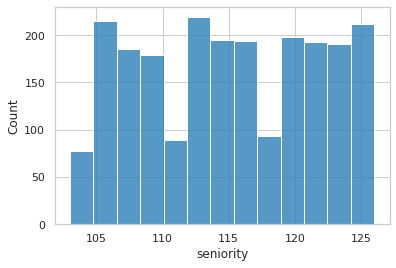

In [ ]:
sns.histplot(
    data=df
    , x='seniority'
)

In [ ]:
num = (df.dtypes == float) | (df.dtypes == int)
num_cols = [c for c in num.index if num[c] == True]
num_cols

['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'seniority',
 'age']

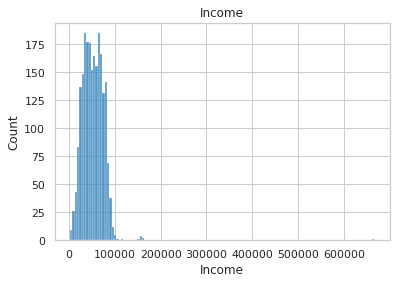

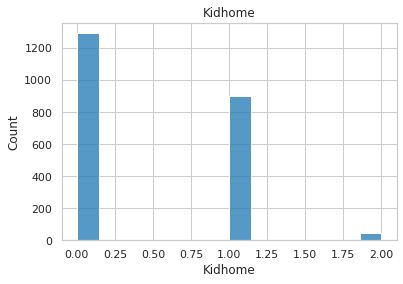

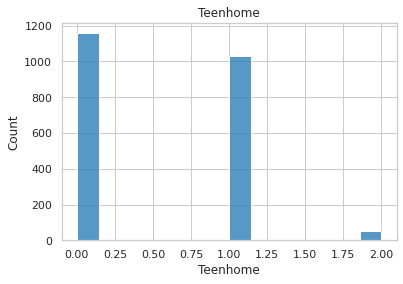

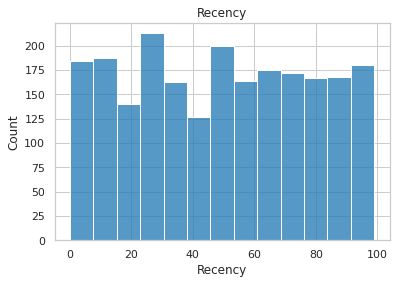

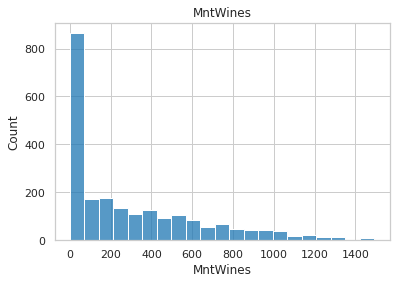

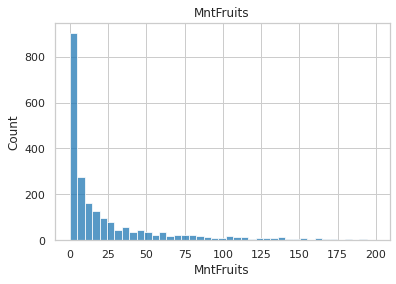

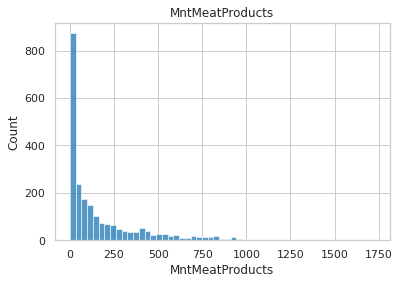

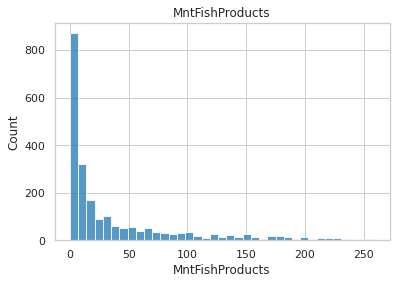

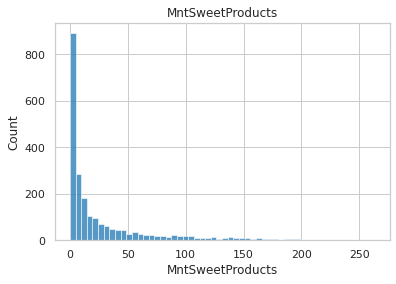

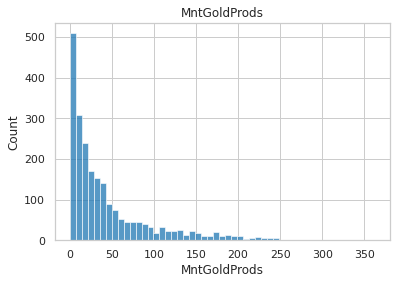

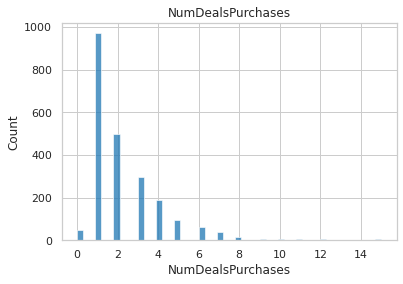

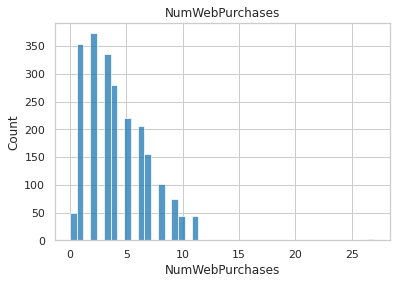

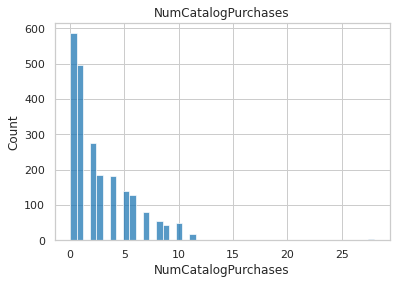

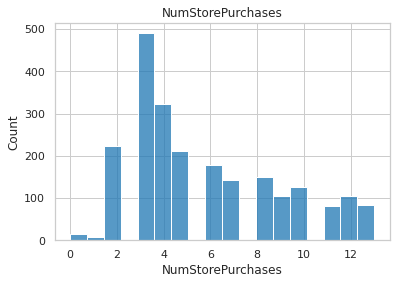

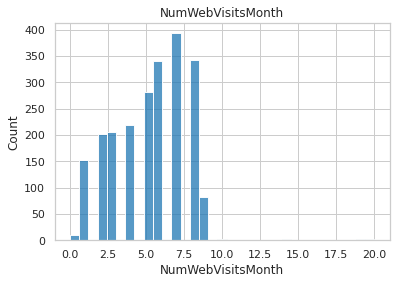

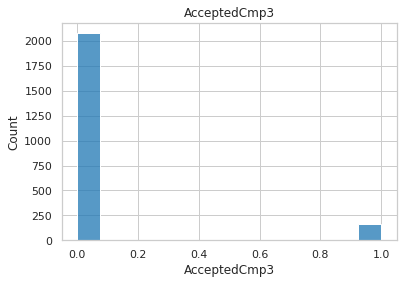

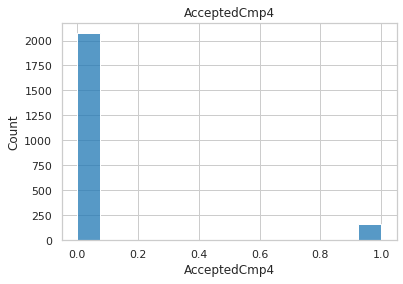

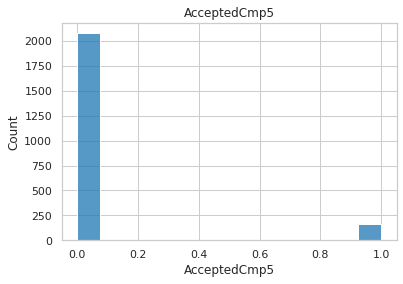

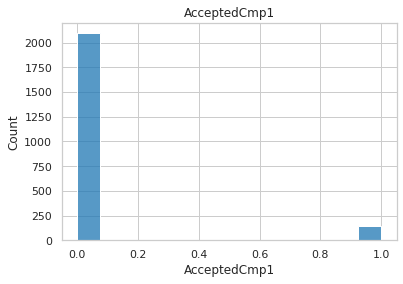

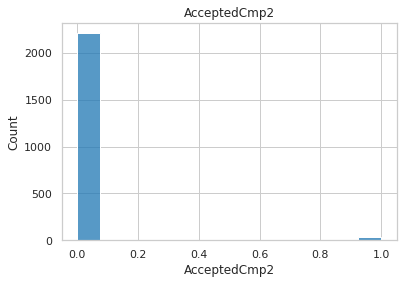

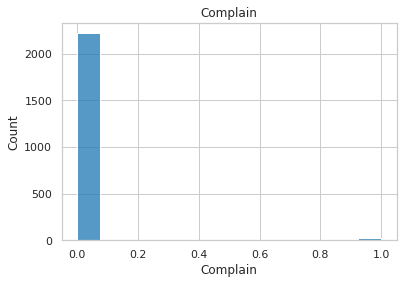

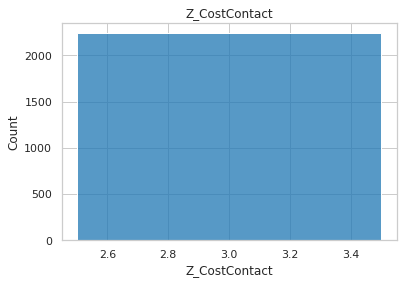

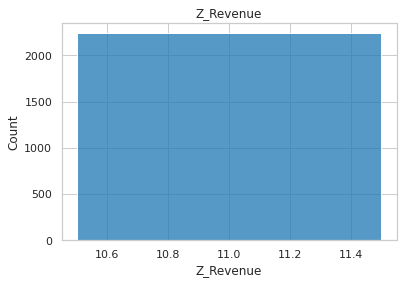

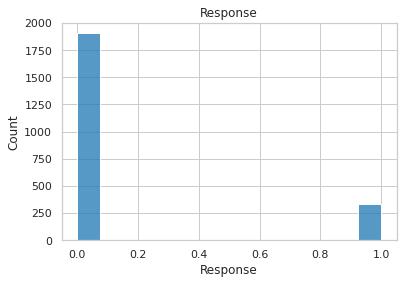

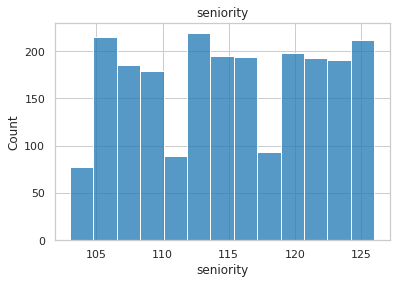

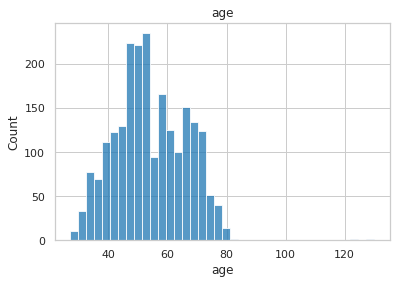

In [ ]:
try:
  num_cols.remove('ID')
  num_cols.remove('Year_Birth')
except ValueError as e:
  print(e)

for num_col in num_cols:
  sns.histplot(
      data=df
      , x=num_col
  )
  plt.title(num_col)
  plt.show()
  print('\n')

#### `Income` column, deeper analysis

-6219.75 109990.75


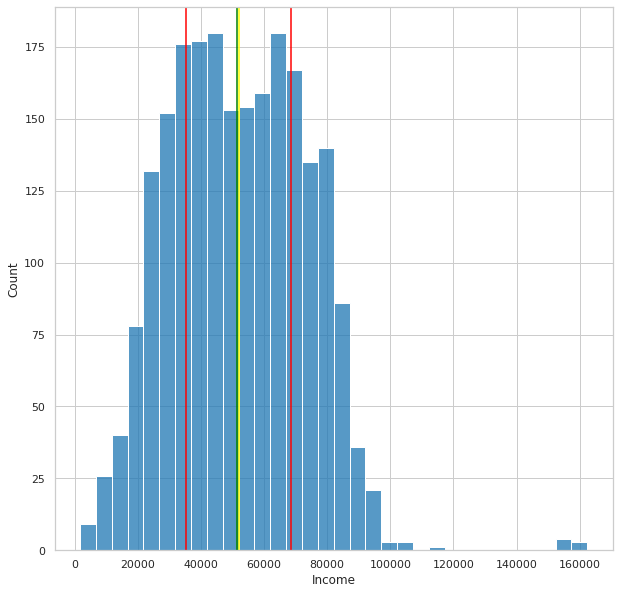

In [ ]:
mask = (df['Income'] > 0) & (df['Income'] <500_000)

mean = df[mask]['Income'].mean()
median = df[mask]['Income'].median()
q_25 = df[mask]['Income'].quantile(0.25)
q_75 = df[mask]['Income'].quantile(0.75)

iqr = q_75 - q_25
lower_limit = q_25 - 1.25 * iqr
upper_limit = q_75 + 1.25 * iqr

plt.figure(figsize = (10, 10))

sns.histplot(
    data=df[mask]
    , x='Income'
)

plt.axvline(x=mean, color='yellow')
plt.axvline(x=median, color='g')
plt.axvline(x=q_25, color='r')
plt.axvline(x=q_75, color='r')

print(lower_limit, upper_limit)

plt.show()

#### `age` column, deeper analysis

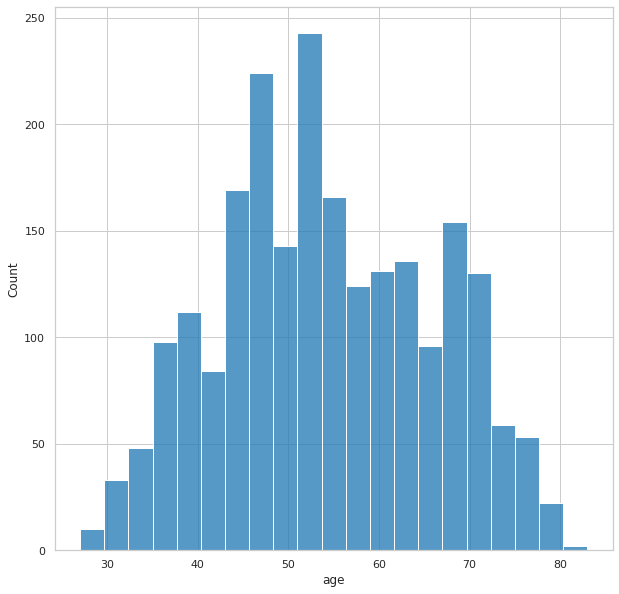

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['age'] < 100], x='age')
plt.show()

## Data preparation

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'seniority', 'age'],
      dtype='object')

In [ ]:
# Creating a column
data = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
data = data.dropna()
data = data[(data['Income'] < 500_000) & (data['age'] < 100)]

# is higher level education
data['higher_level_education'] = np.where(data['Education'] == 'Basic', 0, 1) 

# Is in couple?
data['in_couple'] = np.where(data['Marital_Status'] == 'Together', 1,
                             np.where(data['Marital_Status'] == 'Married', 1, 0)
                             )

# total spending
data['spent_amount'] = (data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] +
                        data['MntFishProducts'] + data['MntSweetProducts'] +
                        data['MntGoldProds'])

data['n_children'] = data['Kidhome'] + data['Teenhome'] # Total children
data['children'] = (data['n_children'] > 0).astype(int) # Has children?

data = data.rename(columns={
    'MntWines':'wines', 'MntFruits':'fruits', 'MntMeatProducts':'meat',
    'MntFishProducts':'fish', 'MntSweetProducts':'sweets','MntGoldProds':'gold',
    'NumWebPurchases':'web', 'NumCatalogPurchases':'catalogue',
    'NumStorePurchases':'store'
    }
)

data.drop(
    ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome',
     'Dt_Customer', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2',
     'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response',
     'NumDealsPurchases','Recency']
     , axis = 1
     , inplace=True

)

data

Income  wines  fruits  meat  fish  sweets  gold  web  catalogue  store  \
0     58138.0    635      88   546   172      88    88    8         10      4   
1     46344.0     11       1     6     2       1     6    1          1      2   
2     71613.0    426      49   127   111      21    42    8          2     10   
3     26646.0     11       4    20    10       3     5    2          0      4   
4     58293.0    173      43   118    46      27    15    5          3      6   
...       ...    ...     ...   ...   ...     ...   ...  ...        ...    ...   
2235  61223.0    709      43   182    42     118   247    9          3      4   
2236  64014.0    406       0    30     0       0     8    8          2      5   
2237  56981.0    908      48   217    32      12    24    2          3     13   
2238  69245.0    428      30   214    80      30    61    6          5     10   
2239  52869.0     84       3    61     2       1    21    3          1      4   

      seniority  age  higher_level_education  in_couple  spent_amount  \
0         125.0   66                       1          0          1617   
1         107.0   69                       1          0            27   
2         114.0   58                       1          1           776   
3         108.0   39                       1          1            53   
4         109.0   42                       1          1           422   
...         ...  ...                     ...        ...           ...   
2235      116.0   56                       1          1          1341   
2236      104.0   77                       1          1           444   
2237      109.0   42                       1          0          1241   
2238      109.0   67                       1          1           843   
2239      124.0   69                       1          1           172   

      n_children  children  
0              0         0  
1              2         1  
2              0         0  
3              1         1  
4              1         1  
...          ...       ...  
2235           1         1  
2236           3         1  
2237           0         0  
2238           1         1  
2239           2         1  

[2212 rows x 17 columns]

### Data Viz

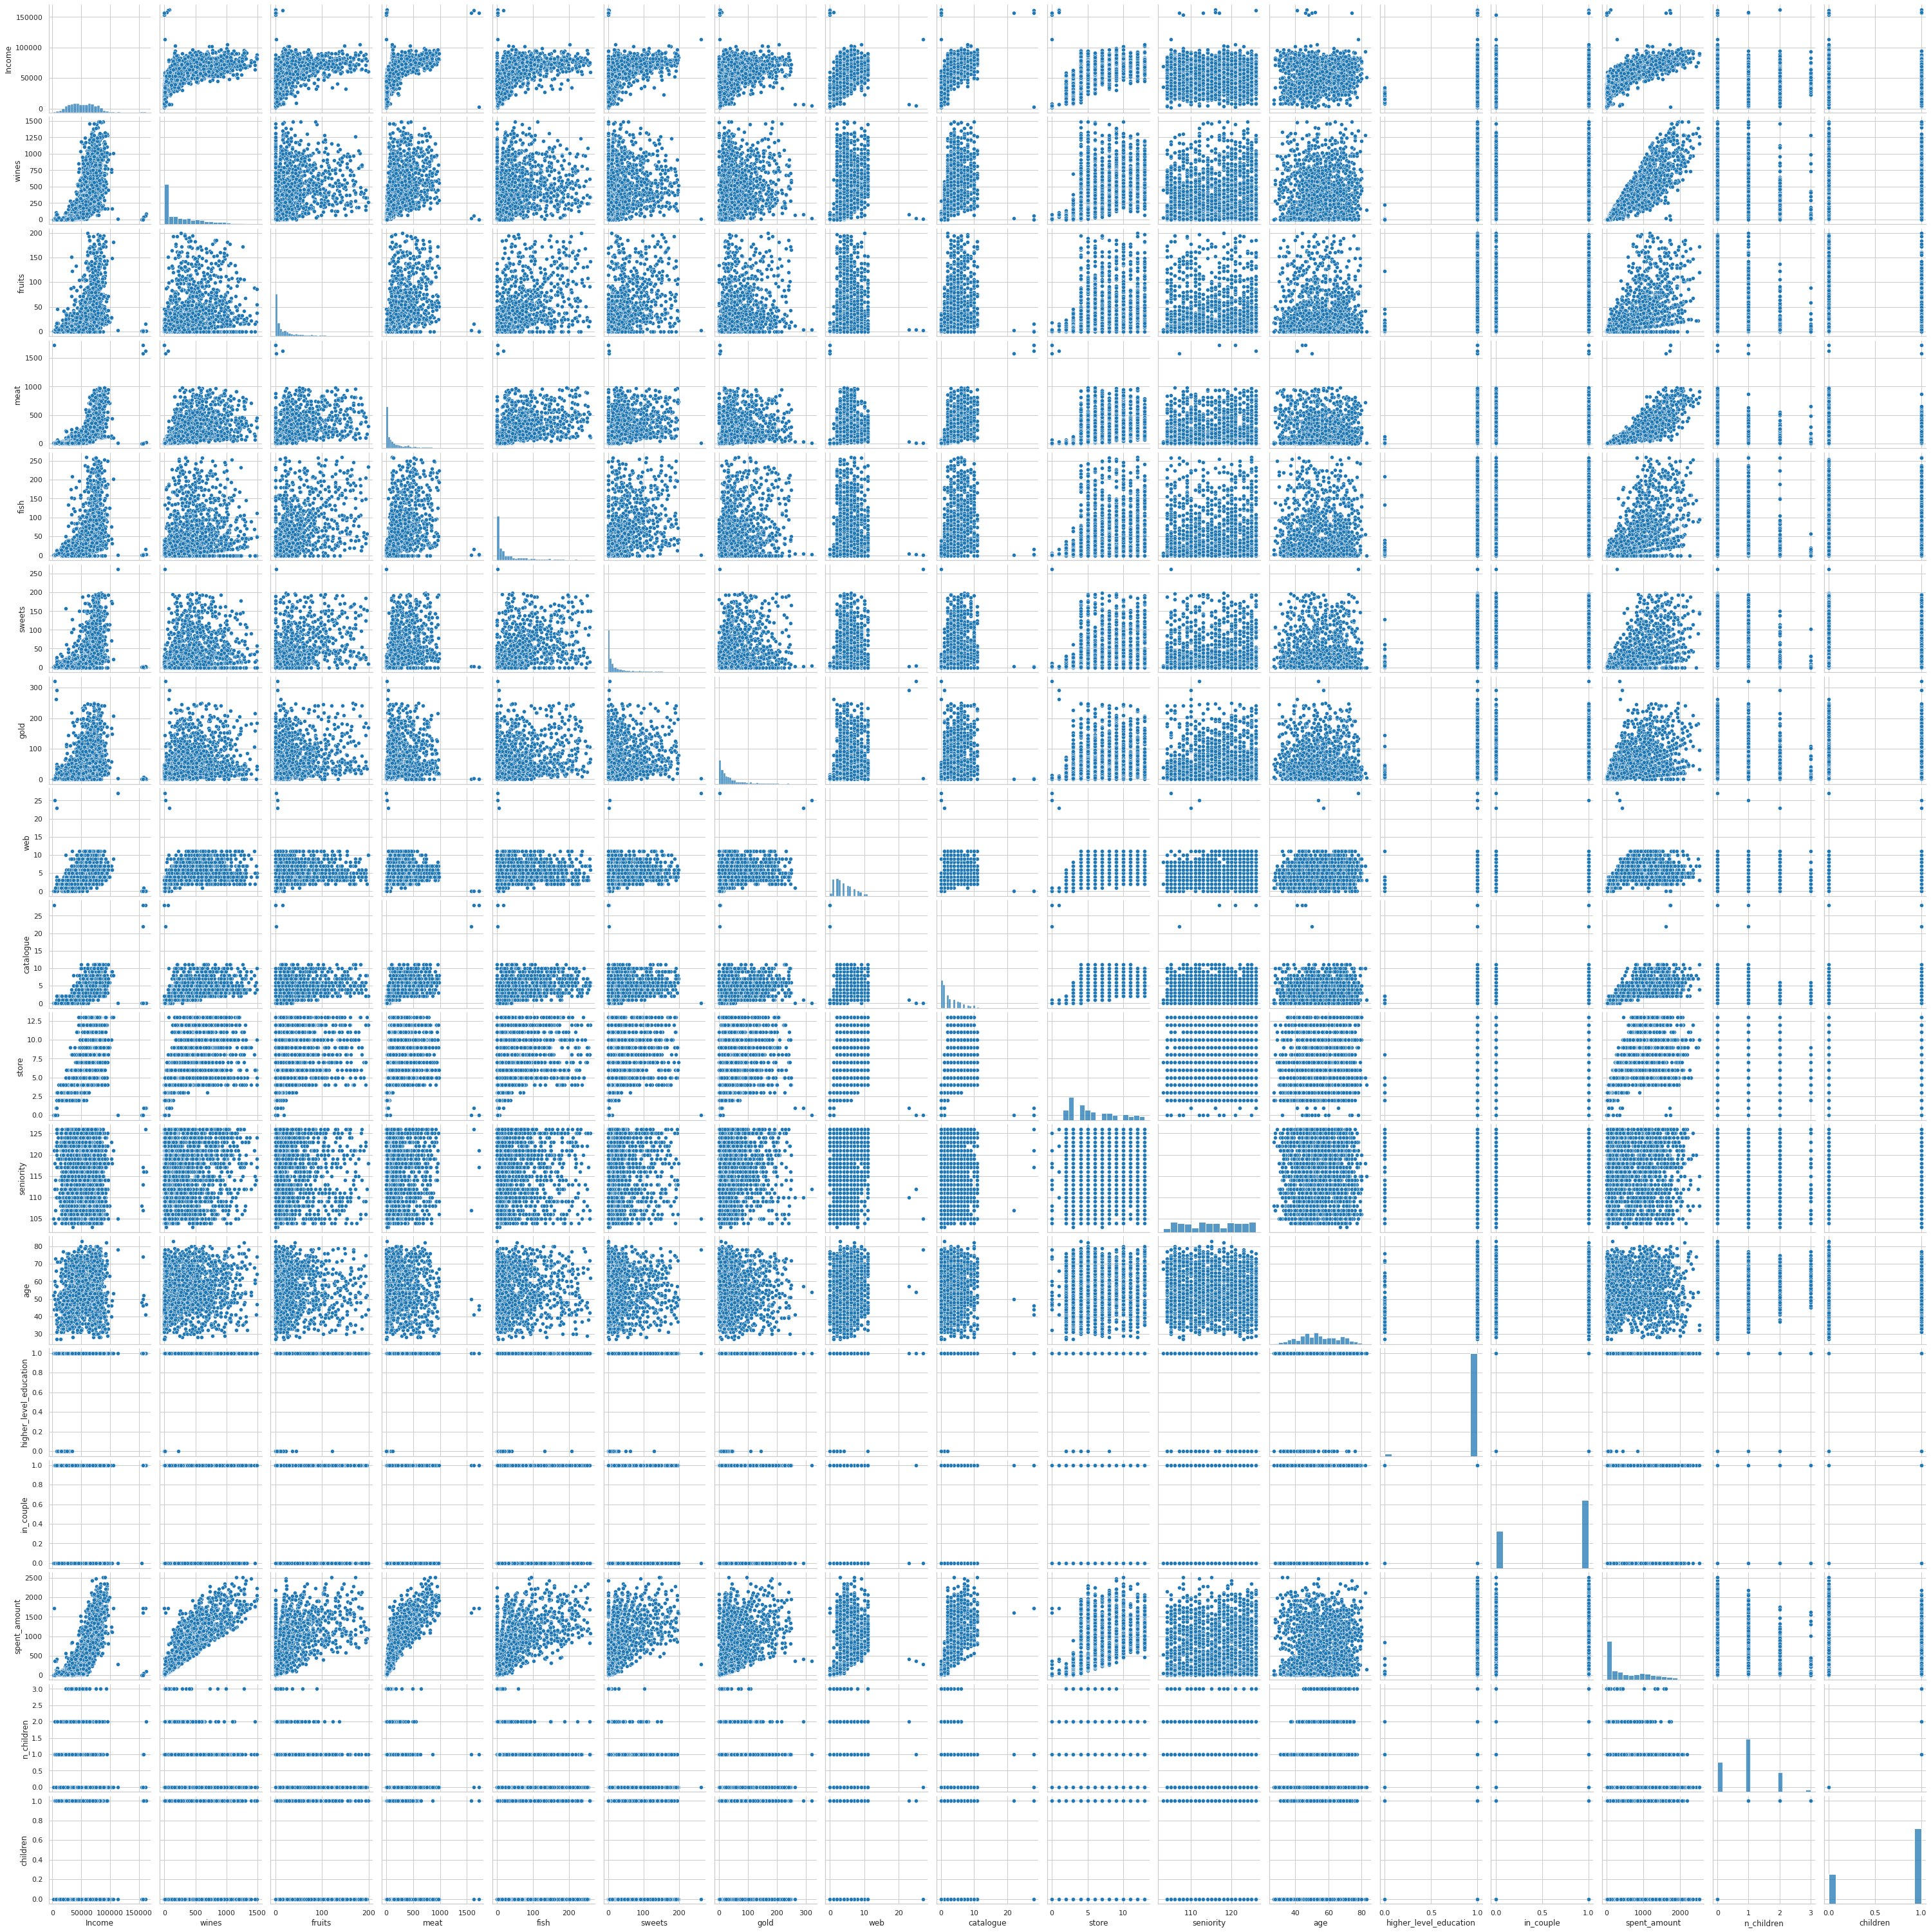

In [ ]:
sns.pairplot(
    data=data
)

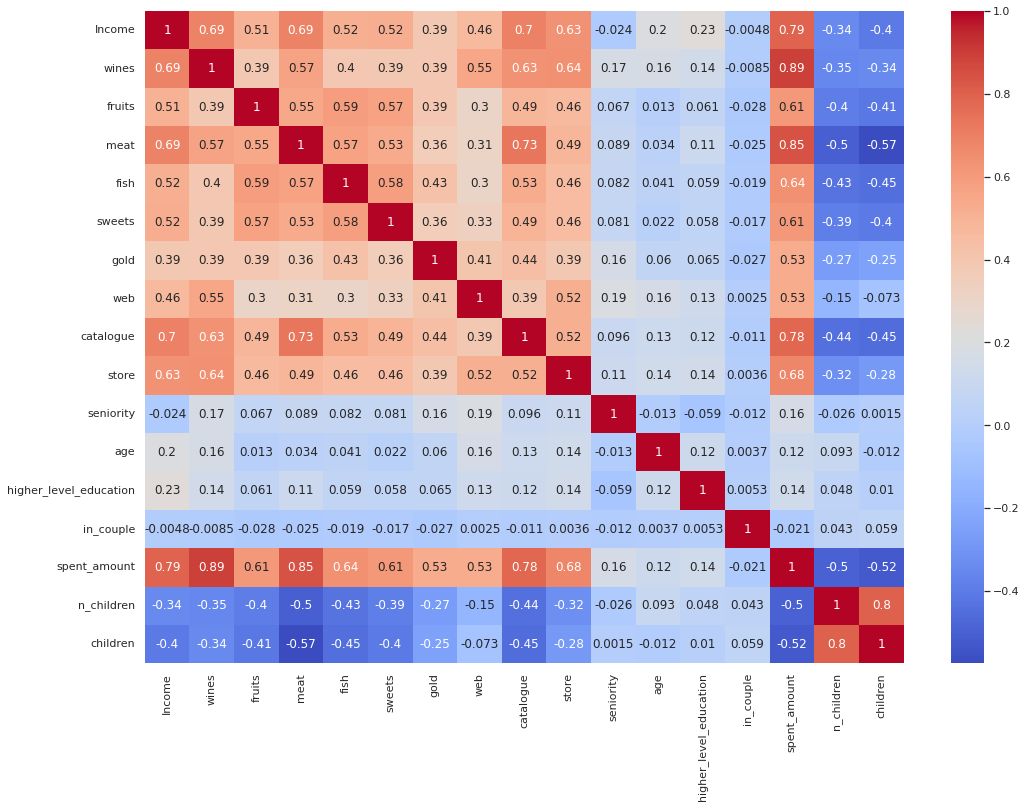

In [ ]:
fig = plt.figure(figsize=(17,12))
sns.heatmap(
    data.corr()
    , annot=True
    , cmap = 'coolwarm'
)

plt.show()

# Clustering Analysis

## Scaling data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data.columns

Index(['Income', 'wines', 'fruits', 'meat', 'fish', 'sweets', 'gold', 'web',
       'catalogue', 'store', 'seniority', 'age', 'higher_level_education',
       'in_couple', 'spent_amount', 'n_children', 'children'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[0.35108641, 0.42531815, 0.44221106, ..., 0.63968254, 0.        ,
        0.        ],
       [0.27767992, 0.00736772, 0.00502513, ..., 0.00873016, 0.66666667,
        1.        ],
       [0.43495553, 0.28533155, 0.24623116, ..., 0.30595238, 0.        ,
        0.        ],
       ...,
       [0.34388518, 0.60817147, 0.24120603, ..., 0.49047619, 0.        ,
        0.        ],
       [0.42021697, 0.28667113, 0.15075377, ..., 0.33253968, 0.33333333,
        1.        ],
       [0.31829187, 0.05626256, 0.01507538, ..., 0.06626984, 0.66666667,
        1.        ]])

In [ ]:
df_data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
df_data_scaled.iloc[0,:].values

array([0.35108641, 0.42531815, 0.44221106, 0.31652174, 0.66409266,
       0.33587786, 0.2741433 , 0.2962963 , 0.35714286, 0.30769231,
       0.95652174, 0.69642857, 1.        , 0.        , 0.63968254,
       0.        , 0.        ])

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=42)
pca.fit(df_data_scaled)

PCA()

In [ ]:
explained_variance_ratio = list(pca.explained_variance_ratio_)

pd.options.display.float_format = '{:,.6f}'.format

df_pca = pd.DataFrame(explained_variance_ratio, columns=['explained_variance_ratio'])
df_pca['cumm_sum'] = df_pca['explained_variance_ratio'].cumsum()
df_pca

explained_variance_ratio  cumm_sum
0                   0.358152  0.358152
1                   0.226211  0.584363
2                   0.123451  0.707814
3                   0.078547  0.786361
4                   0.045321  0.831681
5                   0.035139  0.866820
6                   0.025291  0.892111
7                   0.022393  0.914504
8                   0.018480  0.932984
9                   0.016788  0.949772
10                  0.016057  0.965829
11                  0.011989  0.977818
12                  0.008823  0.986641
13                  0.005630  0.992270
14                  0.004459  0.996729
15                  0.003271  1.000000
16                  0.000000  1.000000

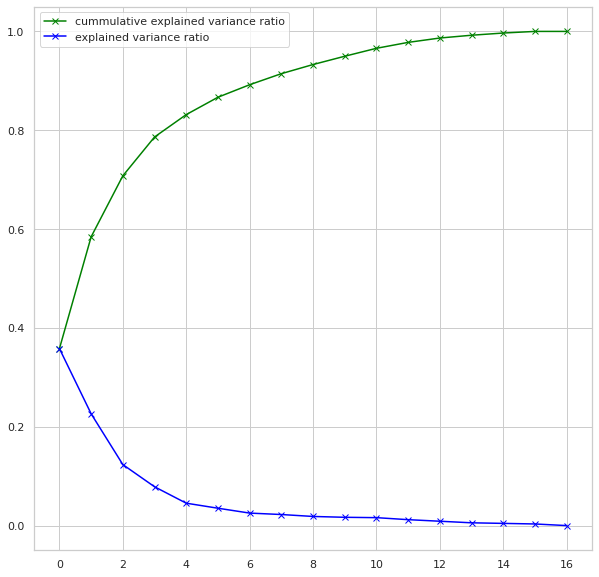

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(df_pca['cumm_sum'], 'g-x', label='cummulative explained variance ratio')
ax.plot(df_pca['explained_variance_ratio'], 'b-x', label='explained variance ratio')
ax.legend()
plt.show()

In [ ]:
pca_n_8 = PCA(8)
pca_n_8.fit(df_data_scaled)
pca_data_scaled = pca_n_8.transform(df_data_scaled)
df_pca_data_scaled = pd.DataFrame(pca_data_scaled)
df_pca_data_scaled.head()

0         1         2         3         4         5         6  \
0  1.142094  0.543586 -0.091162  0.359378 -0.062893 -0.409678  0.313812   
1 -0.575583  0.708958  0.146046 -0.332239 -0.236482 -0.188581  0.109594   
2  0.769953 -0.419615  0.251463 -0.027490 -0.091255 -0.023672 -0.258634   
3 -0.538273 -0.293590  0.279990 -0.176715  0.249341  0.122994 -0.038854   
4 -0.269827 -0.337321 -0.000585 -0.255923  0.291594  0.030971 -0.041536   

          7  
0  0.047825  
1  0.000302  
2 -0.068871  
3 -0.045512  
4 -0.036399

## Models

In [ ]:
from sklearn.cluster import (KMeans, AgglomerativeClustering, DBSCAN, MeanShift)
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

### K-means

In [ ]:
sum_of_squared_distances = []
silhouette_scores = []
k = range(2, 15)
for _ in k:
  km = KMeans(n_clusters = _)
  y = km.fit_predict(df_pca_data_scaled)
  sum_of_squared_distances.append(km.inertia_)
  silhouette_scores.append(silhouette_score(df_pca_data_scaled, y))

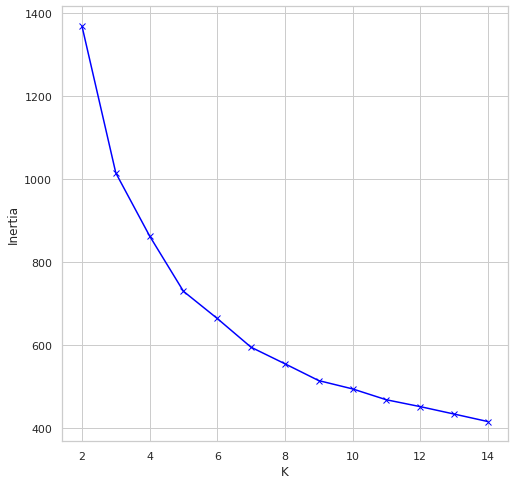

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(k, sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

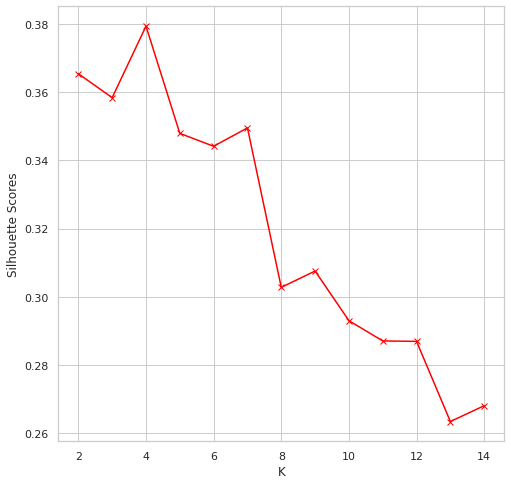

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(k, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette Scores')
plt.show()

In [ ]:
km = KMeans(n_clusters = 4, random_state=42)
y = km.fit_predict(df_pca_data_scaled)
print(silhouette_score(df_pca_data_scaled, y))
data['kmeans_pca'] = y

0.3794133385528388


### Agglomerative Clustering

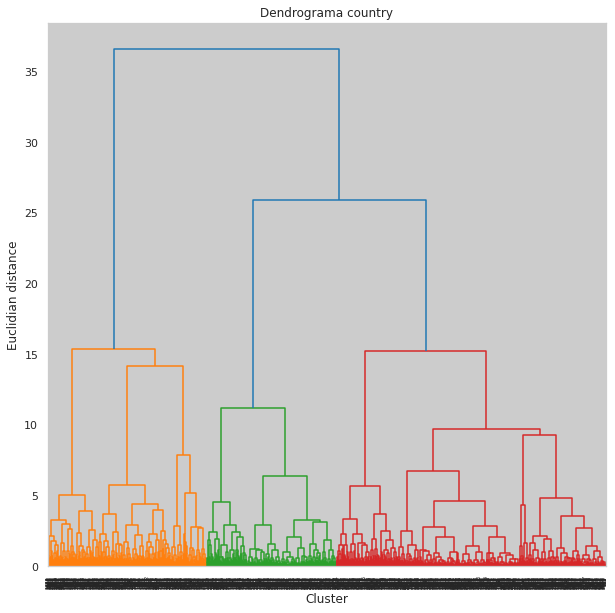

In [ ]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_pca_data_scaled, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Cluster')
plt.ylabel('Euclidian distance')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_pca_data_scaled)
print(silhouette_score(df_pca_data_scaled, y_hc))
data['hc_pca'] = y_hc

0.3508752341912257


### MeanShift

In [ ]:
from sklearn.cluster import estimate_bandwidth

In [ ]:
bandwidth = estimate_bandwidth(df_pca_data_scaled, random_state=5, n_samples=500)
meanshift = MeanShift(bandwidth=bandwidth).fit(df_pca_data_scaled)
meanshift_y = meanshift.predict(df_pca_data_scaled)
print(silhouette_score(df_pca_data_scaled, meanshift_y))
data['meanshift_pca'] = meanshift.labels_

0.36462923742025727


### DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
neighbors = NearestNeighbors(n_neighbors=16)
neighbors_fit = neighbors.fit(df_pca_data_scaled)
distances, indices = neighbors_fit.kneighbors(df_pca_data_scaled)

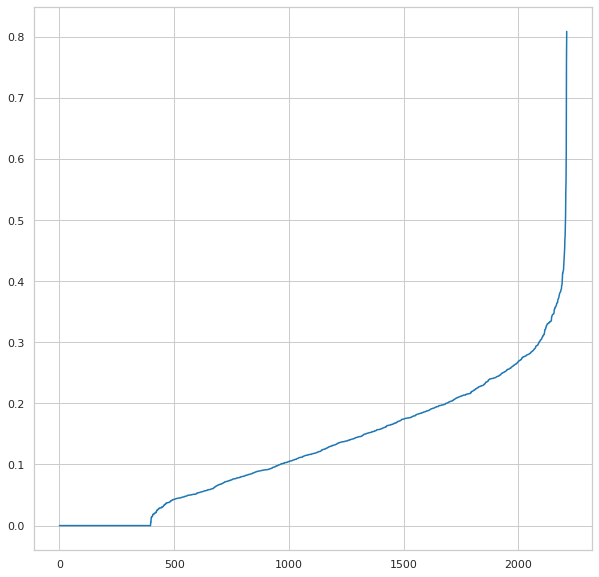

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [ ]:
eps_values = np.arange(0.1, 0.41, 0.02)
min_samples = np.arange(3, 20)

In [ ]:
from itertools import product
dbscan_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []

for p in dbscan_params:
  y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_pca_data_scaled)
  try:
    sil_score.append(silhouette_score(df_pca_data_scaled, y_dbscan))
    
  except:
    sil_score.append(0)
  no_of_clusters.append(len(np.unique(y_dbscan)))

In [ ]:
df_param_tunning = pd.DataFrame.from_records(dbscan_params, columns=['eps', 'min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [ ]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='eps', index='min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='eps', index='min_samples')

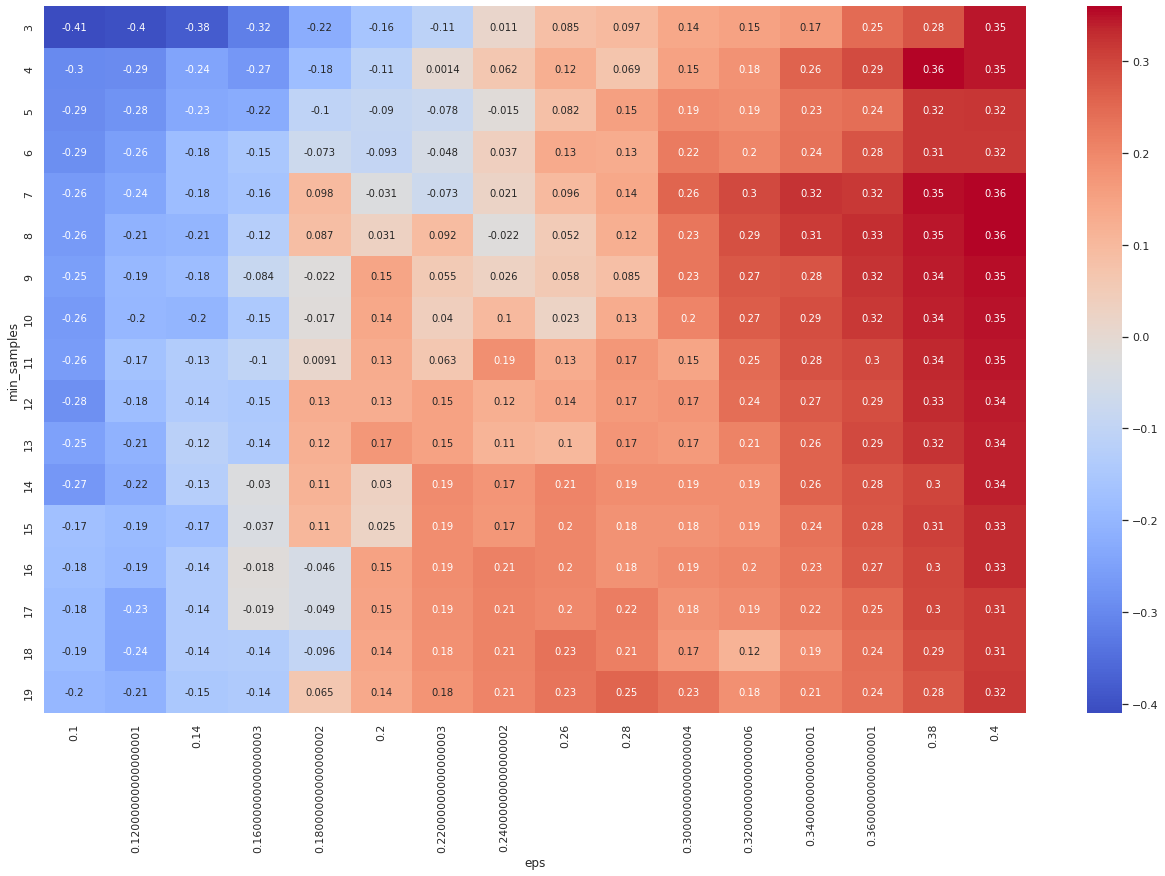

In [ ]:
fig, ax = plt.subplots(figsize=(22, 13))

sns.heatmap(
    data=pivot_1
    , annot=True
    , annot_kws={'size':10}
    , cmap='coolwarm'
    , ax=ax
)
plt.show()

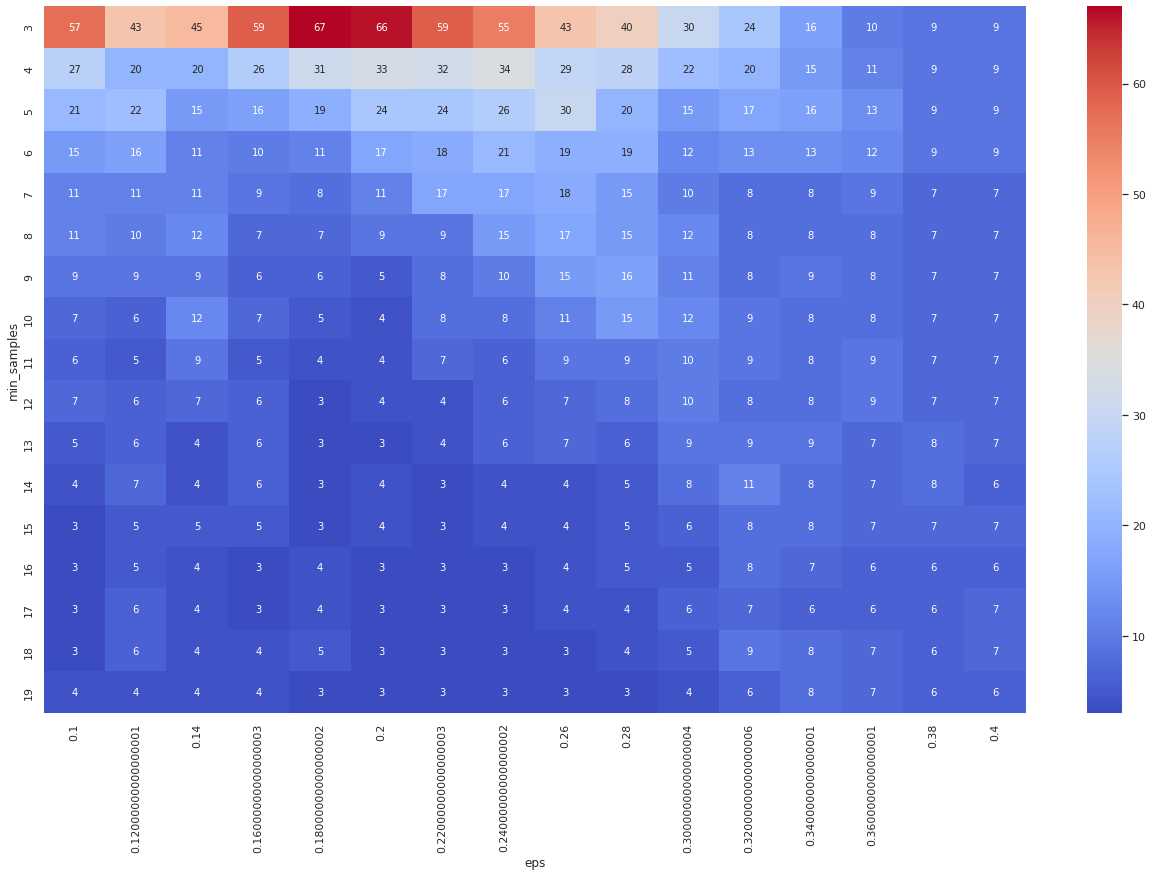

In [ ]:
fig, ax = plt.subplots(figsize=(22, 13))

sns.heatmap(
    data=pivot_2
    , annot=True
    , annot_kws={'size':10}
    , cmap='coolwarm'
    , ax=ax
)
plt.show()

In [ ]:
dbscan_train = DBSCAN(eps=0.4, min_samples=7)
y_dbscan = dbscan_train.fit_predict(df_pca_data_scaled)
print(silhouette_score(df_pca_data_scaled, y_dbscan))
data['dbscan_pca'] = y_dbscan

0.3593306903815908


# Customer Personality Analysis

Based on the evaluation applied in each clustering algorithm, it is going to be used the output from `KMeans` algorithm because its result using `silhouette score` and number of clusters.


*   `KMeans` - `silhouette_score` = 0.37927885566533004 - Clusters = 4.
*   `MeanShift` - `silhouette_score` = 0.36454052543466675 - Clusters = 2.
*   `DBSCAN` - `silhouette_score` = 0.35962718382653863 - Clusters = 7.
*   `AgglomerativeClustering` - `silhouette_score` = 0.35075229872421654 - Clusters = 3.



In [ ]:
columns_to_add = ['Education','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4',
                  'AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain',
                  'Response','NumDealsPurchases','Marital_Status','Recency']

mask = (pd.isna(df['Income']) == False) & (df['Income'] < 500_000) & (df['age'] < 100)

for column in columns_to_add:
  values = df[mask][column].values
  data[column] = values

# data.drop(['hc_pca','dbscan_pca','meanshift_pca'], axis=1, inplace=True)

In [ ]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
for n in range(4):
  group_n = data[data['kmeans_pca']==n].shape
  print(f'Group: {n}, {group_n}', sep='\n')

Group: 0, (532, 29)
Group: 1, (1048, 29)
Group: 2, (380, 29)
Group: 3, (252, 29)


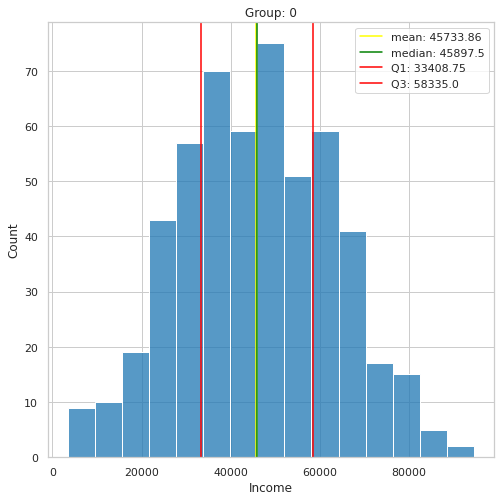

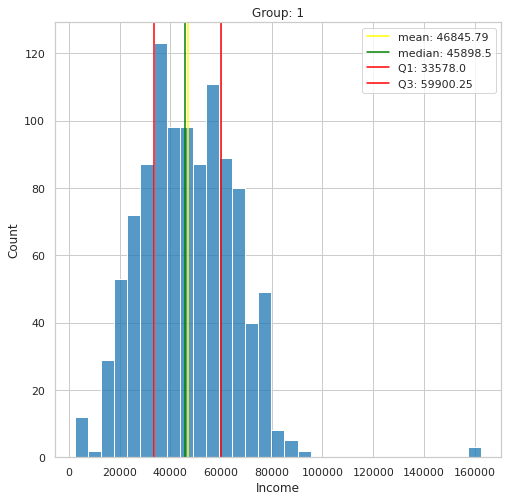

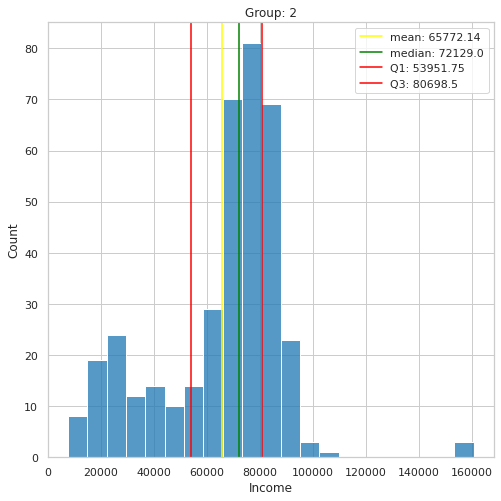

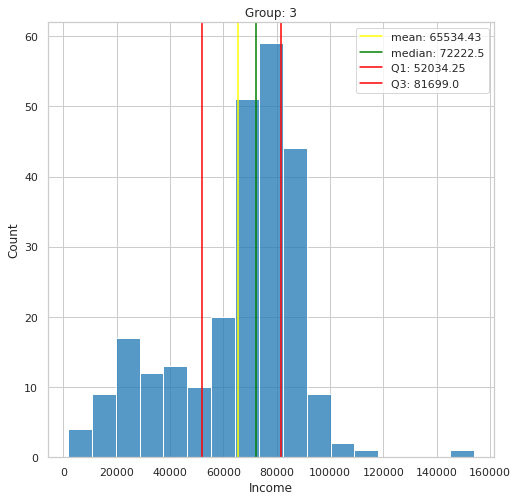

In [ ]:
for n in range(4):
  plt.figure(figsize=(8,8))
  sns.histplot(
      data=data[data['kmeans_pca']==n]
      , x='Income'
  )
  mean = data[data['kmeans_pca']==n]['Income'].mean()
  median = data[data['kmeans_pca']==n]['Income'].median()
  q_1 = data[data['kmeans_pca']==n]['Income'].quantile(0.25)
  q_3 = data[data['kmeans_pca']==n]['Income'].quantile(0.75)

  plt.axvline(x=mean, color='yellow', label=f'mean: {round(mean, 2)}')
  plt.axvline(x=median, color='g', label=f'median: {round(median, 2)}')
  plt.axvline(x=q_1, color='r', label=f'Q1: {q_1}')
  plt.axvline(x=q_3, color='r', label=f'Q3: {q_3}')
  plt.title(f'Group: {n}')
  plt.legend()

  plt.show()
  print('\n')

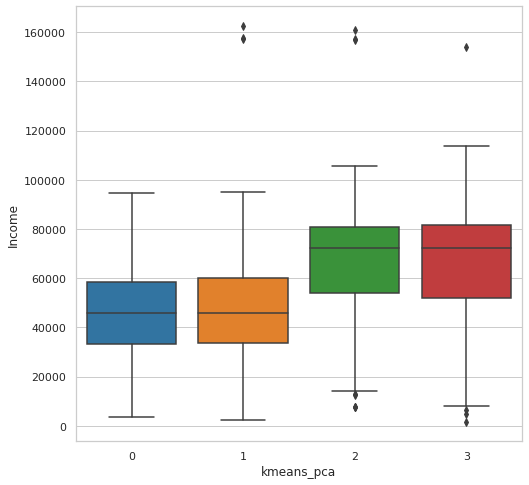

In [ ]:
plt.figure(figsize=(8,8))

sns.boxplot(
    x=data['kmeans_pca']
    , y=data['Income']
)

plt.show()

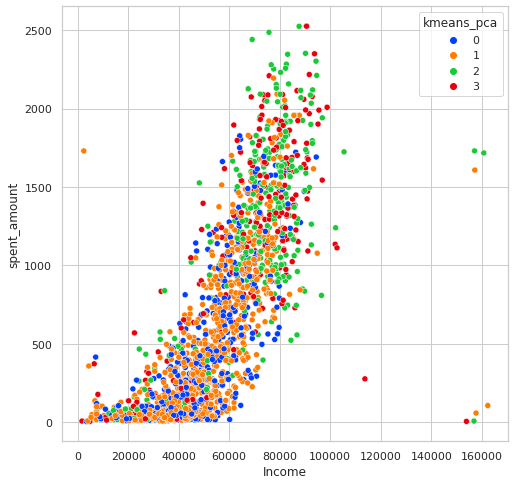

In [ ]:
plt.figure(figsize=(8,8))

sns.scatterplot(
    data = data
    , x = 'Income'
    , y = 'spent_amount'
    , hue = 'kmeans_pca'
    , palette = 'bright'
)

plt.show()

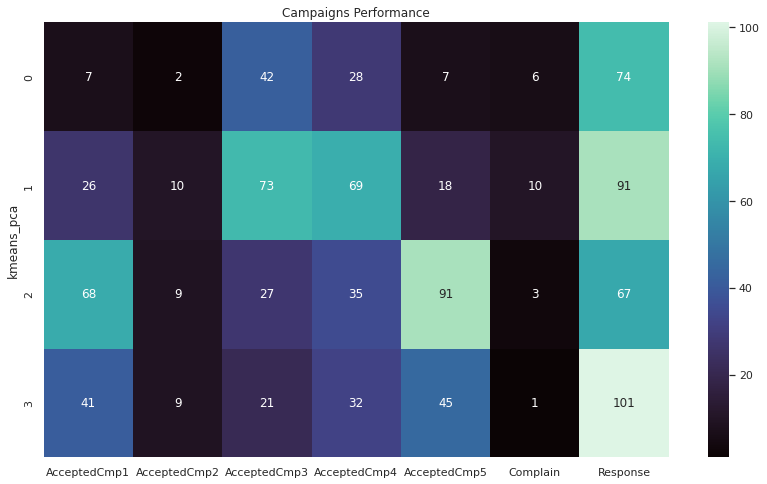

In [ ]:
column_list = ['kmeans_pca','AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5',
               'AcceptedCmp1', 'AcceptedCmp2','Response', 'Complain']

pivot_campaign = pd.pivot_table(data = data[column_list]
               , index='kmeans_pca'
               , values=['AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Response', 'Complain']
               , aggfunc='sum')

plt.figure(figsize=(14,8))

sns.heatmap(
    data = pivot_campaign
    , annot=True
    , cmap = 'mako'
    , fmt=".0f"
)
plt.title('Campaigns Performance')

plt.show()

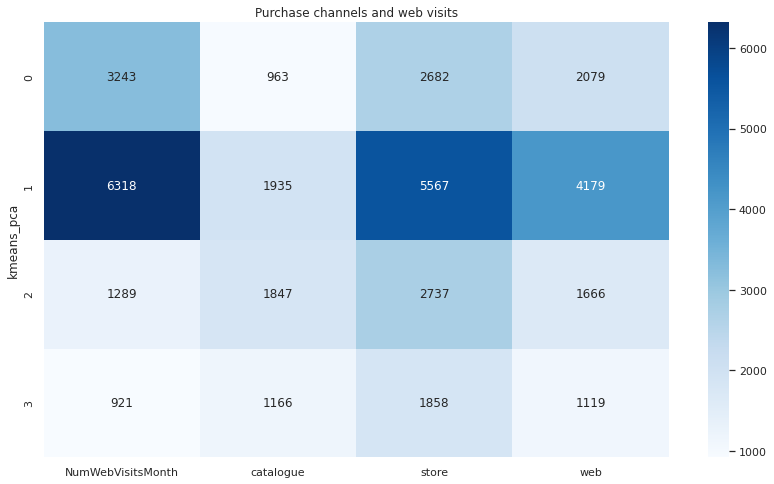

In [ ]:
column_list =['web','catalogue', 'store','kmeans_pca','NumWebVisitsMonth']

pivot_channel_purchase = pd.pivot_table(data = data[column_list]
               , index='kmeans_pca'
               , values=['web','catalogue', 'store', 'NumWebVisitsMonth']
               , aggfunc='sum')

plt.figure(figsize=(14,8))

sns.heatmap(
    data = pivot_channel_purchase            
    , annot=True
    , cmap = 'Blues'
    , fmt=".0f"
)
plt.title('Purchase channels and web visits')

plt.show()

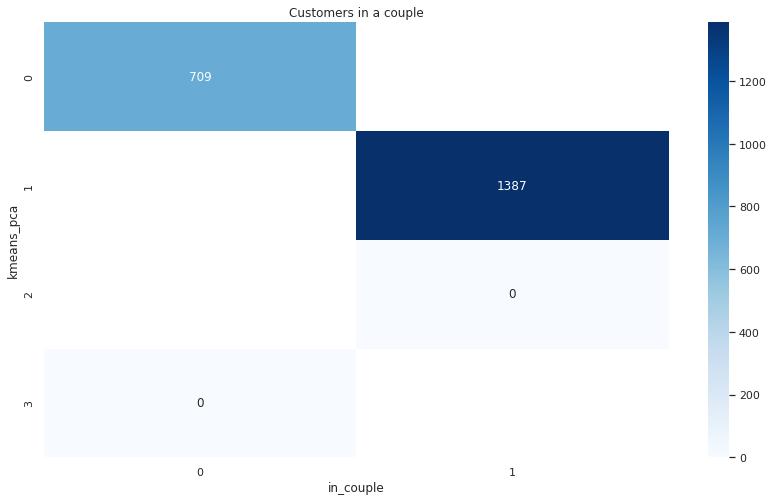

In [ ]:
column_list =['n_children','in_couple','kmeans_pca']

pivot_in_a_couple = pd.pivot_table(data = data[column_list]
               , index='kmeans_pca'
               , columns='in_couple'
               , values='in_couple'
               , aggfunc='sum')

plt.figure(figsize=(14,8))

sns.heatmap(
    data = pivot_in_a_couple            
    , annot=True
    , cmap = 'Blues'
    , fmt=".0f"
)
plt.title('Customers in a couple')

plt.show()

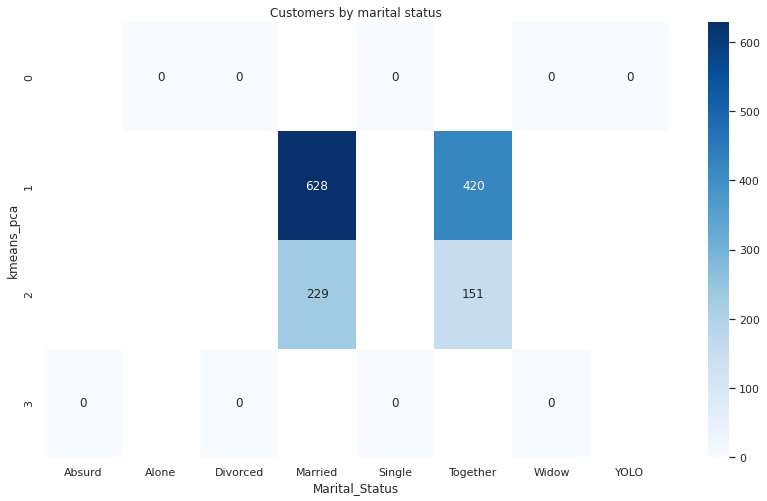

In [ ]:
column_list =['Marital_Status','in_couple','kmeans_pca']

pivot_couple_type = pd.pivot_table(data = data[column_list]
               , index='kmeans_pca'
               , columns='Marital_Status'
               , values='in_couple'
               , aggfunc='sum')

plt.figure(figsize=(14,8))

sns.heatmap(
    data = pivot_couple_type            
    , annot=True
    , cmap = 'Blues'
    , fmt=".0f"
)
plt.title('Customers by marital status')

plt.show()

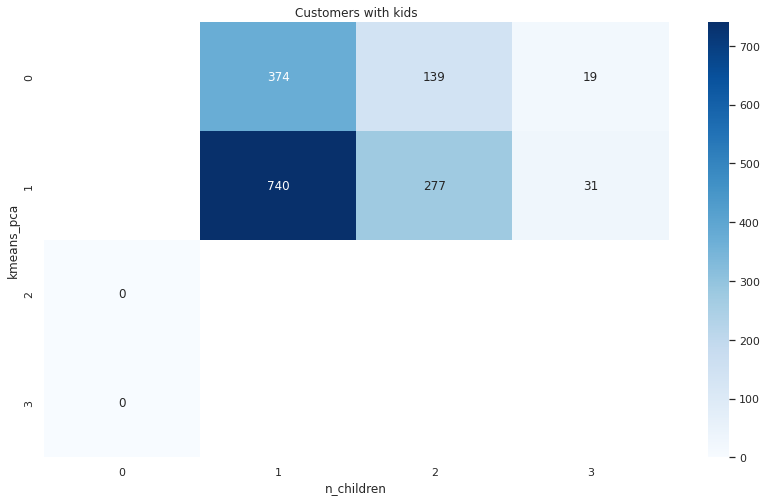

In [ ]:
column_list =['n_children','in_couple','kmeans_pca','children']

pivot_with_children = pd.pivot_table(data = data[column_list]
               , index='kmeans_pca'
               , columns='n_children'
               , values='children'
               , aggfunc='sum')

plt.figure(figsize=(14,8))

sns.heatmap(
    data = pivot_with_children            
    , annot=True
    , cmap = 'Blues'
    , fmt=".0f"
)
plt.title('Customers with kids')

plt.show()

In [ ]:
agg_dict ={
    'n_children':'sum'
}

data.groupby(['kmeans_pca','in_couple','Marital_Status']).agg(agg_dict)

n_children
kmeans_pca in_couple Marital_Status            
0          0         Alone                    5
                     Divorced               232
                     Single                 403
                     Widow                   67
                     YOLO                     2
1          1         Married                827
                     Together               560
2          1         Married                  0
                     Together                 0
3          0         Absurd                   0
                     Divorced                 0
                     Single                   0
                     Widow                    0

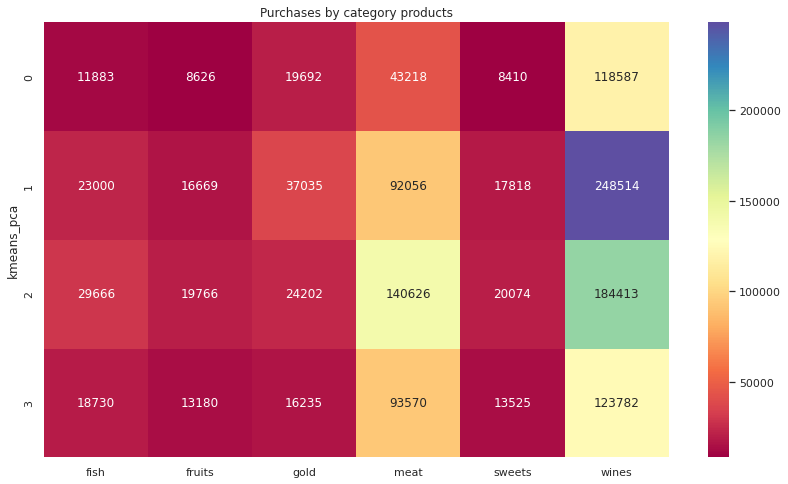

In [ ]:
column_list =['kmeans_pca','wines', 'fruits', 'meat', 'fish', 'sweets', 'gold']

pivot_purchase_products = pd.pivot_table(data = data[column_list]
               , index='kmeans_pca'
               , values=['wines', 'fruits', 'meat', 'fish', 'sweets', 'gold']
               , aggfunc='sum')

plt.figure(figsize=(14,8))

sns.heatmap(
    data = pivot_purchase_products
    , annot=True
    , cmap = 'Spectral'
    , fmt=".0f"
)
plt.title('Purchases by category products')

plt.show()

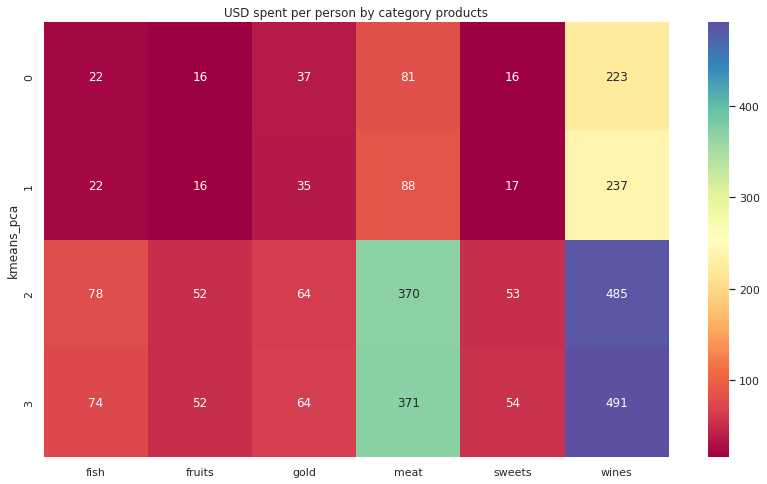

In [ ]:
column_list =['kmeans_pca','wines', 'fruits', 'meat', 'fish', 'sweets', 'gold']

pivot_purchase_products = pd.pivot_table(data = data[column_list]
               , index='kmeans_pca'
               , values=['wines', 'fruits', 'meat', 'fish', 'sweets', 'gold']
               , aggfunc='mean')

plt.figure(figsize=(14,8))

sns.heatmap(
    data = pivot_purchase_products
    , annot=True
    , cmap = 'Spectral'
    , fmt=".0f"
)
plt.title('USD spent per person by category products')

plt.show()

In [ ]:
agg_dict = {
    'spent_amount':'sum'
}

data.groupby('kmeans_pca').agg(agg_dict).reset_index().sort_values('spent_amount', ascending=False)

kmeans_pca  spent_amount
1           1        435092
2           2        418747
3           3        279022
0           0        210416

In [ ]:
agg_dict = {
    'spent_amount':'sum'
}

data.spent_amount.median()
data.groupby('kmeans_pca').agg(agg_dict).reset_index().sort_values('spent_amount', ascending=False)

kmeans_pca  spent_amount
1           1        435092
2           2        418747
3           3        279022
0           0        210416

In [ ]:
cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
data['Income_group'] = pd.qcut(data['Income'], q=4, labels=cut_labels_Income)

agg_dict = {
    'NumDealsPurchases':'count'
}

print(data.groupby(['kmeans_pca','Income_group']).agg(agg_dict))
print(data.Income.median())

                                  NumDealsPurchases
kmeans_pca Income_group                            
0          Low income                           150
           Low to medium income                 184
           Medium to high income                149
           High income                           49
1          Low income                           302
           Low to medium income                 319
           Medium to high income                308
           High income                          119
2          Low income                            60
           Low to medium income                  28
           Medium to high income                 60
           High income                          232
3          Low income                            41
           Low to medium income                  22
           Medium to high income                 37
           High income                          152
51371.0


In [ ]:
agg_dict = {
    'age':'count'
}

data.groupby(['kmeans_pca','in_couple','Marital_Status']).agg(agg_dict)

age
kmeans_pca in_couple Marital_Status     
0          0         Alone             3
                     Divorced        173
                     Single          304
                     Widow            50
                     YOLO              2
1          1         Married         628
                     Together        420
2          1         Married         229
                     Together        151
3          0         Absurd            2
                     Divorced         58
                     Single          166
                     Widow            26

In [ ]:
agg_dict = {
    'age':'count'
}

data.groupby(['higher_level_education']).agg(agg_dict)

age
higher_level_education      
0                         54
1                       2158

In [ ]:
agg_dict = {
    'Recency':'median'
}

print(data.groupby('kmeans_pca').agg(agg_dict))
print(data.Recency.median())

             Recency
kmeans_pca          
0          49.000000
1          50.000000
2          47.000000
3          53.500000
49.0


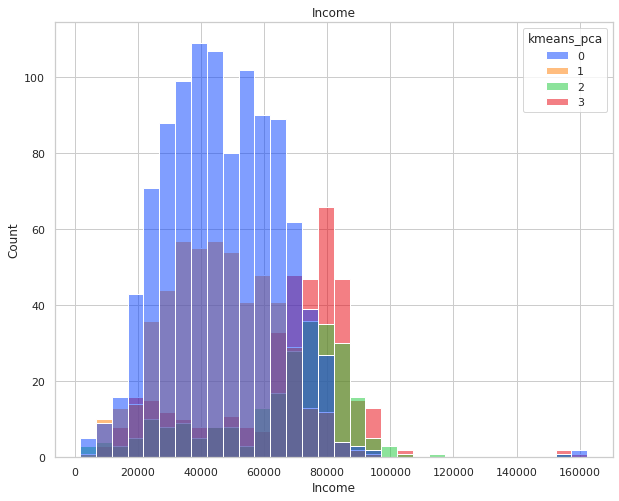

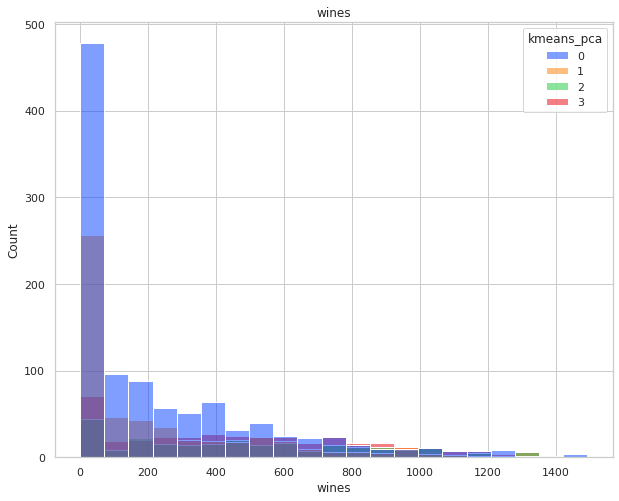

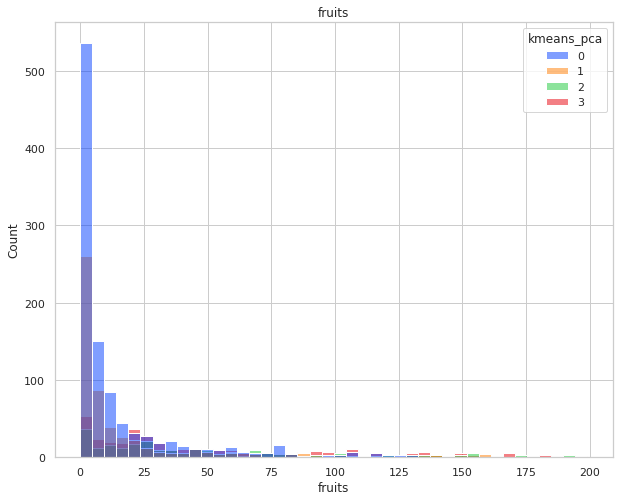

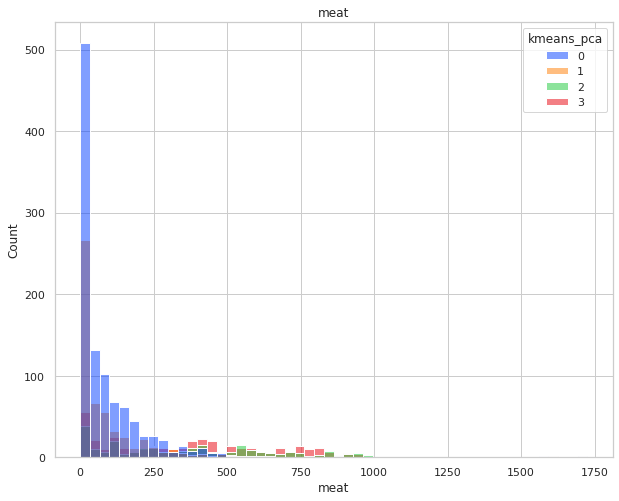

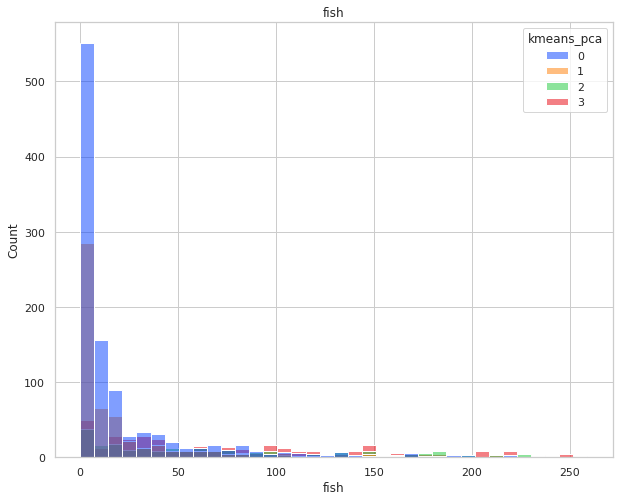

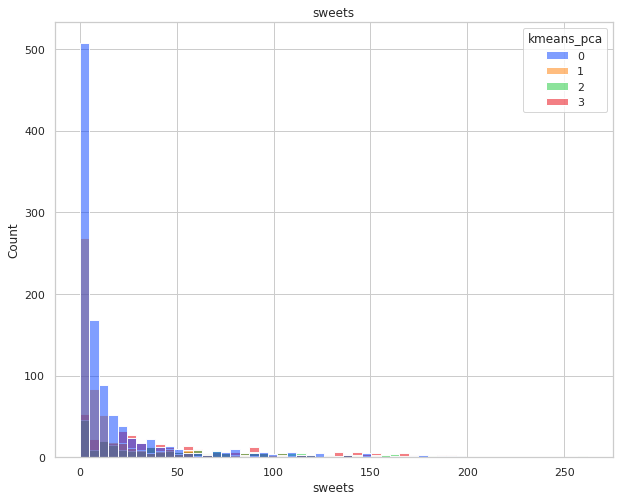

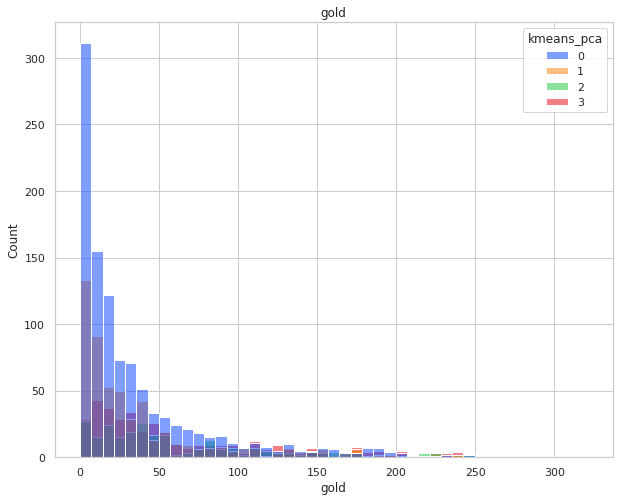

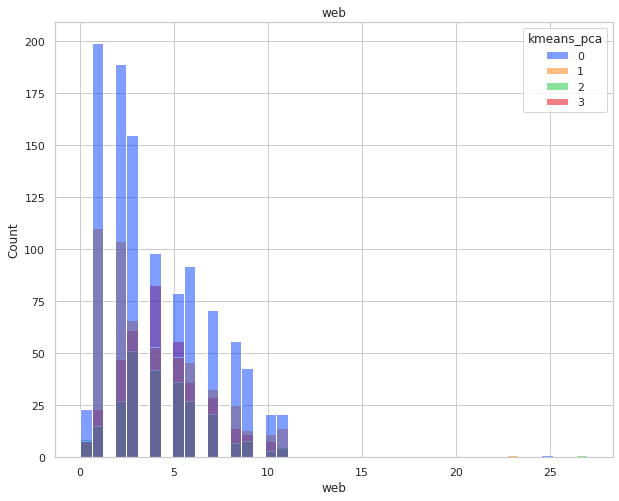

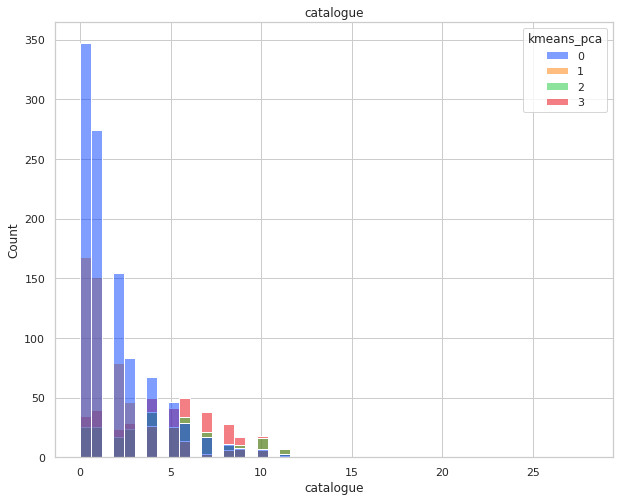

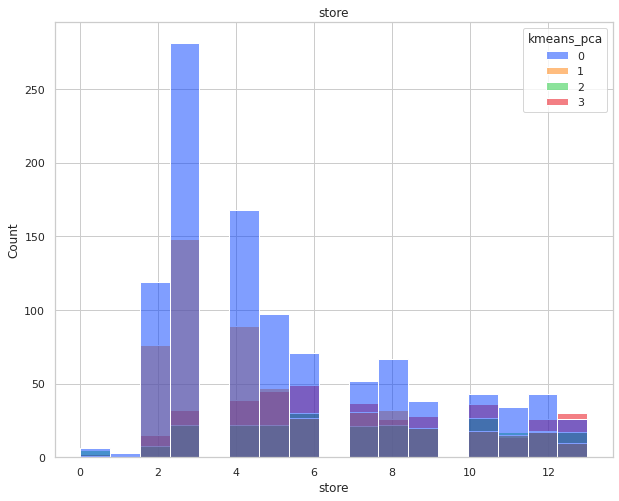

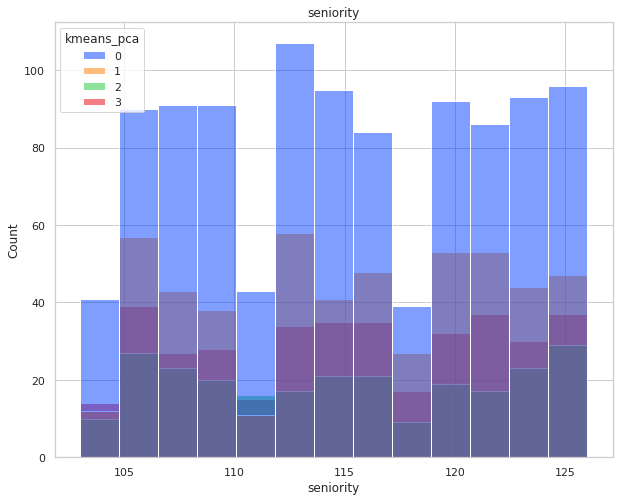

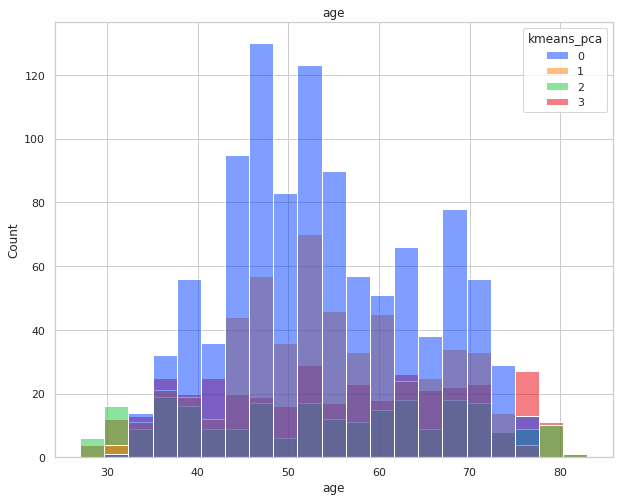

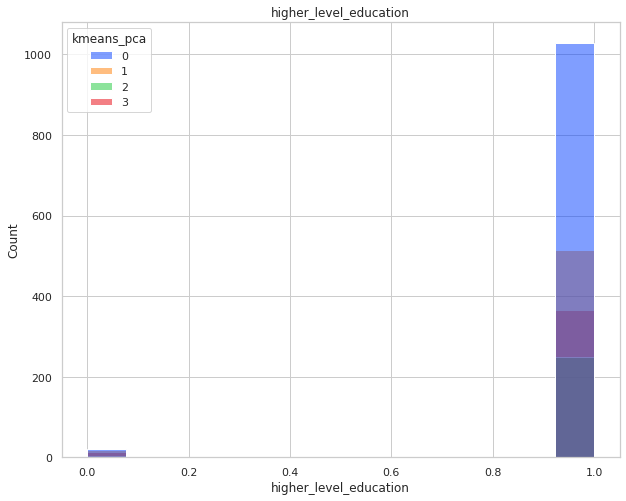

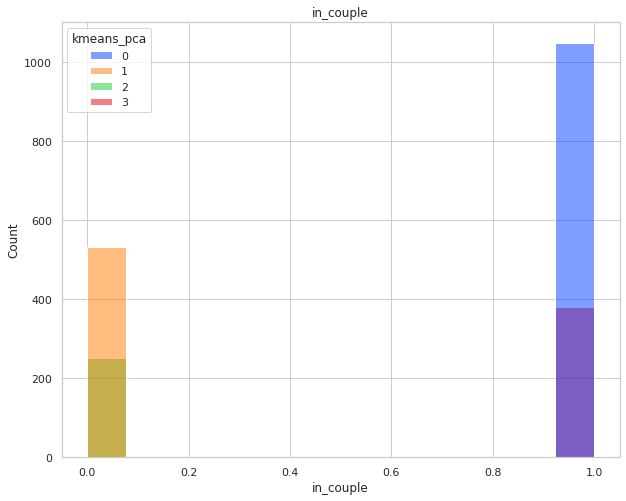

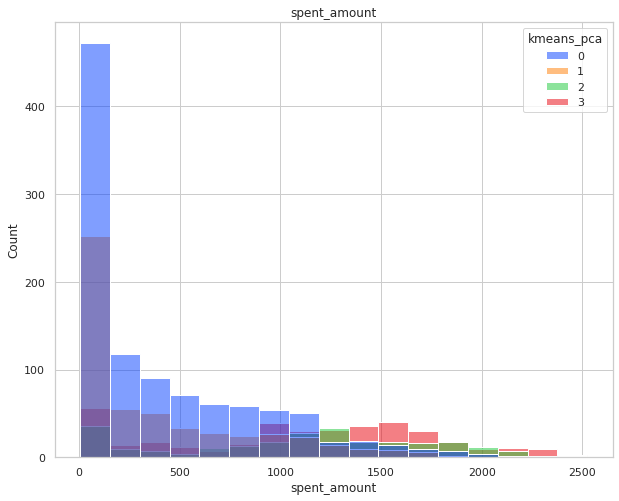

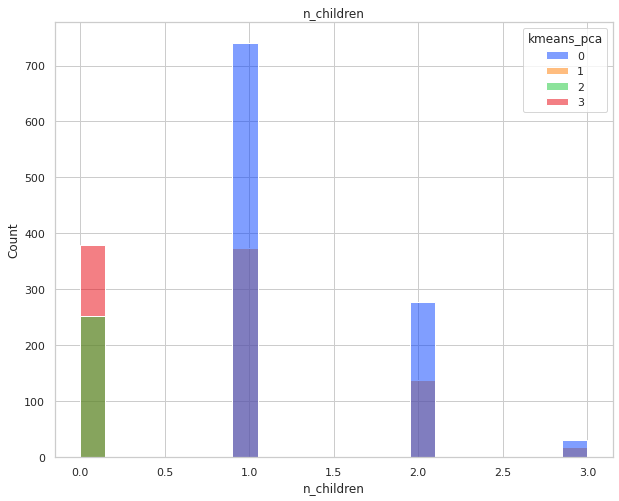

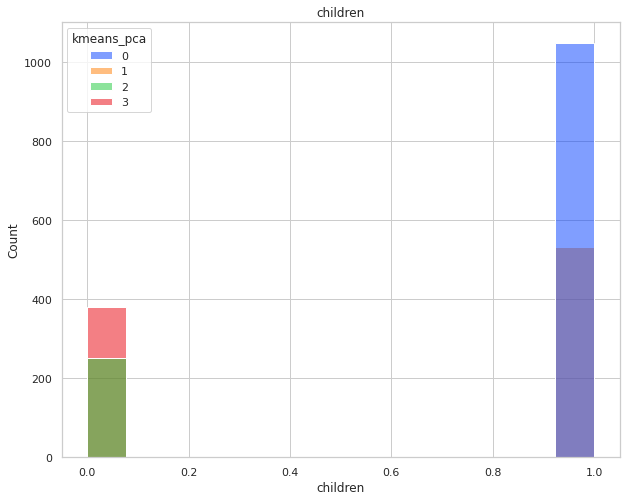

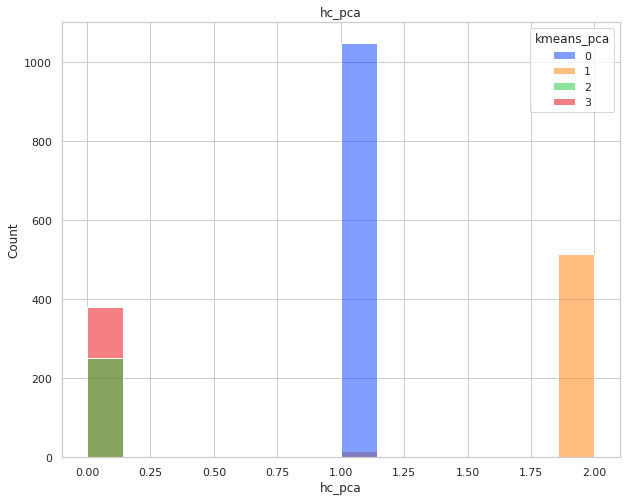

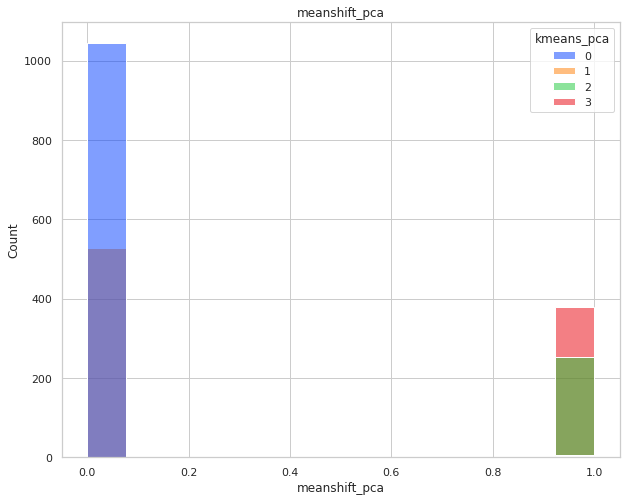

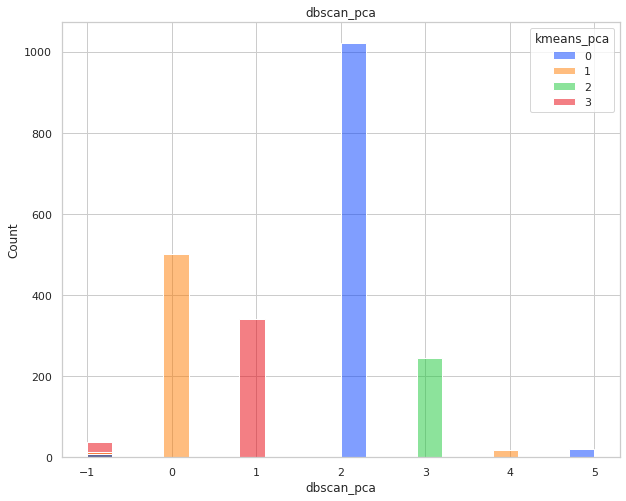

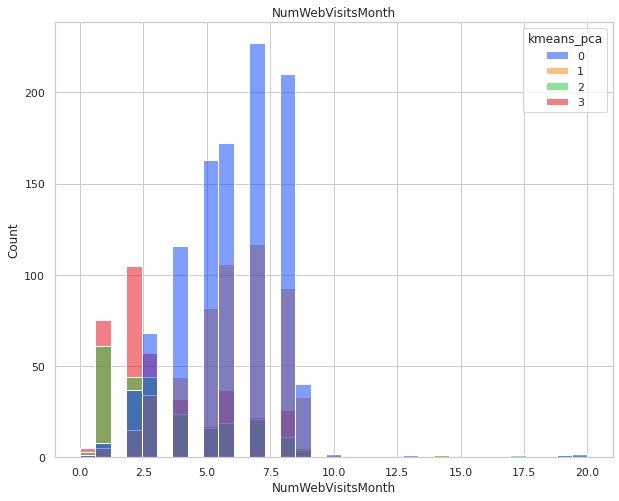

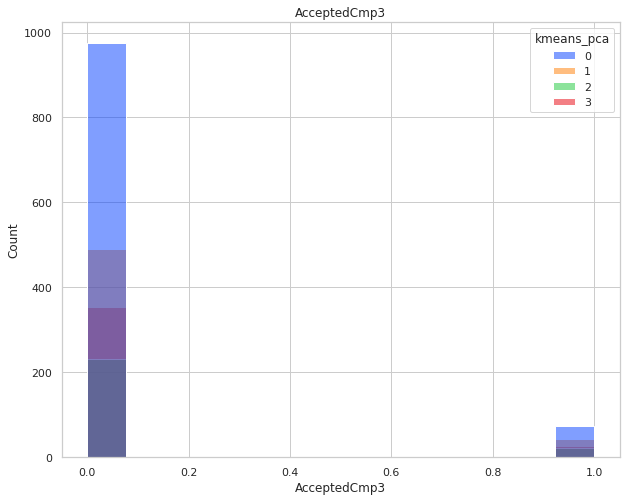

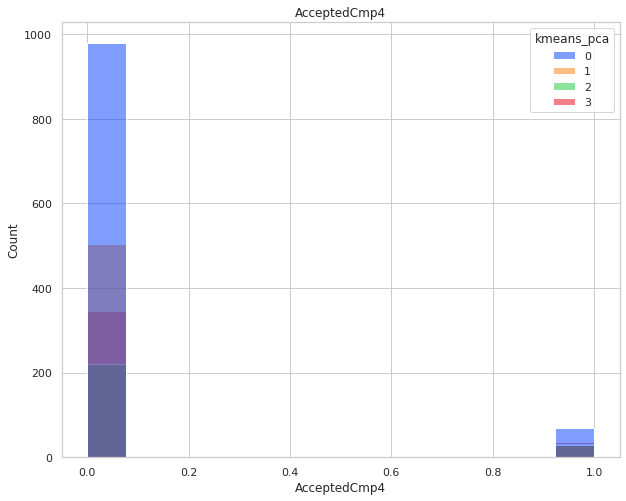

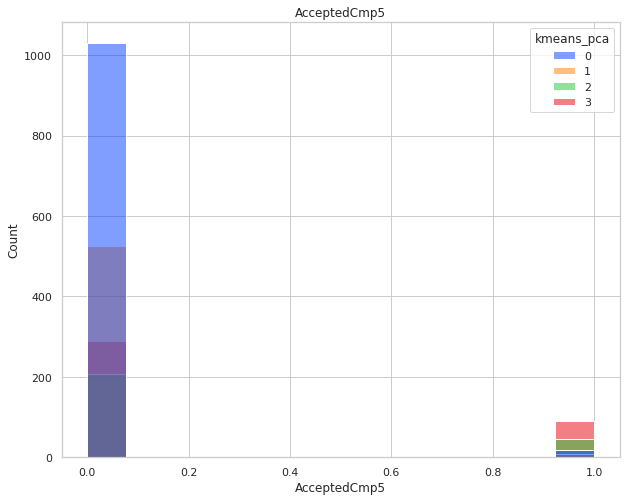

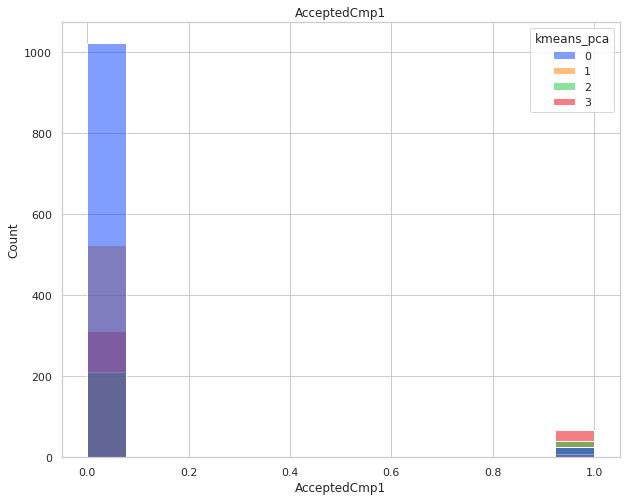

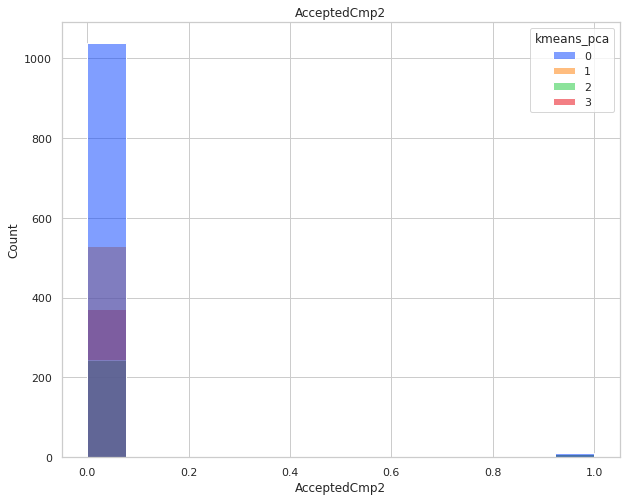

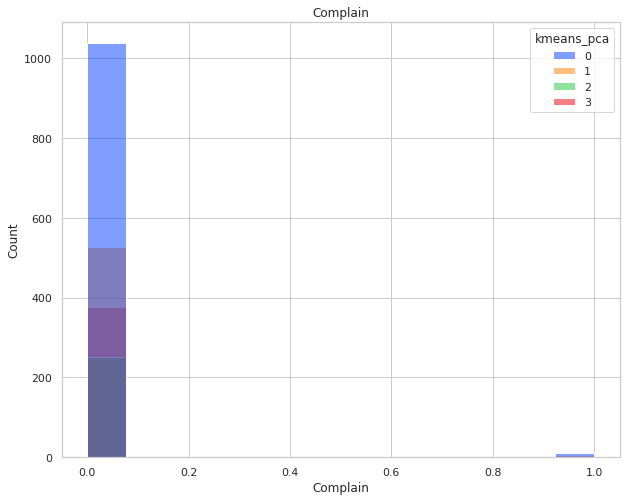

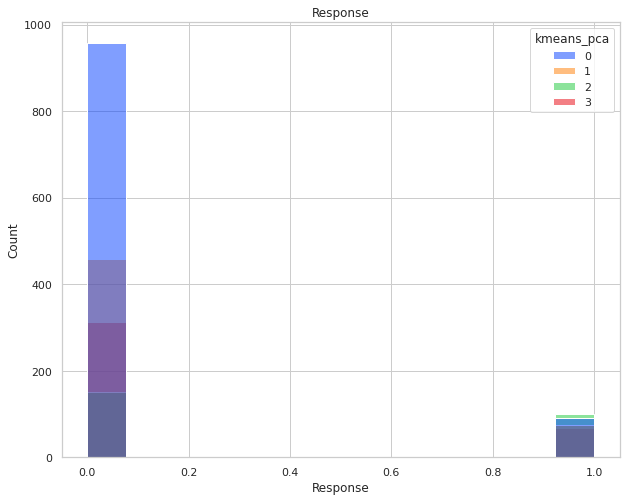

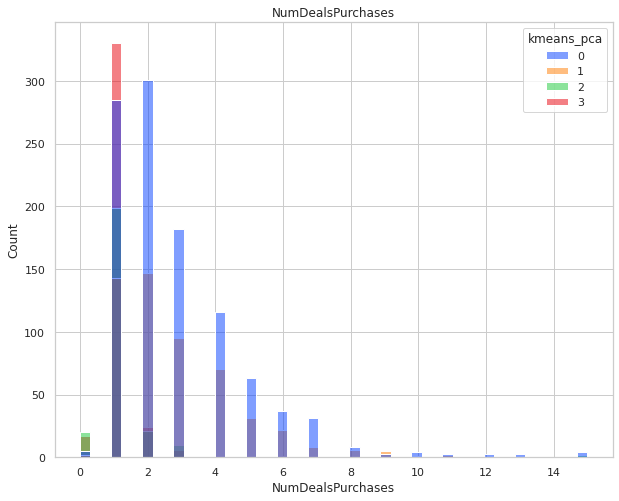

In [ ]:
num = (data.dtypes == float) | (data.dtypes == int)
num_cols = [c for c in num.index if num[c] == True]

for num_col in num_cols:
  plt.figure(figsize=(10,8))
  sns.histplot(
      data=data
      , x=num_col
      , hue='kmeans_pca'
      , palette = 'bright'
  )
  plt.title(num_col)
  plt.show()
  print('\n')

# Insights

*Median income:* **USD 51 371**<br>
*Median Expenditure:* **USD 395.5**<br>*Median Recency:* **49 days**<br>*Median Seniority:* **115 months**<br>9*7.56 % at least with a undergraduate degree*<br>*Prefer channel to bought -->> Store*

## Group: 0, *(customers: 532)*

*   It is the group which has spent less money -- **USD 210 416**
*   4th group that accepts more offers.
*   3 most bought product categories: [wines, meat, gold].
*   Not in a couple (Order Z -> A):
  *   Single: 57 %.
  *   Divorced: 33 %.
  *   Widow: 10 %.
*   With children, 70 % with 1 child.
*   Most discount purchases made -- 2950 purchases.
*   Purchases by channel (Order Z -> A):
  *   Store: 47 %.
  *   Web: 36 %.
  *   Catalogue: 17 %
*   Low and medium income group (similar to group 1).

## Group: 1, *(customers: 1048)*

*   It is the group which has spent more money -- **USD 435 092**
*   2nd group that accepts more offers.
*   3 most bought product categories: [wines, meat, gold]
*   In a couple (Order Z -> A):
  *   Married: 60 %.
  *   Together: 40 %.
*   With children, 71 % with 1 child.
*   Group with more website visits in the last month.
*   2nd most discount purchases mede -- 1470 purchases.
*   Purchases by channel (Order Z -> A):
  *   Store: 48 %.
  *   Web: 35 %.
  *   Catalogue: 17 %
*   Low and medium income group (similar to group 0).

## Group: 2, *(customers: 380)* 

*   It is the 2nd group which has spent more money -- **USD 418 747**
*   Group that accepts more offers.
*   3 most bought product categories: [wines, meat, fish].
*   In a couple (Order Z -> A):
  *   Married: 60 %.
  *   Together: 40 %.
*   No children.
*   Purchases by channel (Order Z -> A):
  *   Store: 44 %.
  *   Catalogue: 30 %.
  *   Web: 26 %
*   Medium to high and High income group, 77 % (similar to group 3).

## Group: 3, *(customers: 252)*

*   It is the 2nd group which has spent more money -- **USD 279 022**
*   3rd group that accepts more offers.
*   3 most bought product categories: [wines, meat, fish].
*   Not in a couple (Order Z -> A):
  *   Single: 67 %.
  *   Divorced: 23 %.
  *   Widow: 10 %.
*   No children.
*   Group with less website visits in the last month.
*   Purchases by channel (Order Z -> A):
  *   Store: 45 %.
  *   Catalogue: 28 %.
  *   Web: 27 %
*   Medium to high and High income group, 75 % (similar to group 3).


